# Sampling

## Probability vs Statistics
- Probability starts with known probabilities and obtains how probable any particular observation would be
- Statistics works the other way around. Start with observations (data) and try to determine the probabilities of each event
- Coin flip example

## Descriptive vs Inferential vs Predictive Statistics
- Descriptive Statistics simply describe what is observed. The average height of a high school football team can be directly calculated by measuring all of the current players height.
- When doing inferential statistics we are trying to say something general about a larger group of subjects than those we have measured. To continue the football example, we would be doing descriptive statistics if we wanted to know about the average height of all high school football teams.
    - To put it another way, statistical inference is the process by which we take observations of a subset of a group and generalize to the whole group.
    - In statistics the entire group is known as the population while the subset is a sample
    - We would use samples if the population is:
        - Too big to enumerate
        - Difficult, time consuming or expensive to get new samples
- Predictive statistics is when we don’t so much care about the relationships between variables but how accurate* the outputs are

## Hands on Example: What is the proportion of m&m’s in the bowl?
    - How should we calculate this?
        - Guess
        - Brute force (count every piece of candy)
        - Sampling!

### Sampling Procedure 

1. Each person will come up to sample 10 pieces of candy from the bowl with spoon
2. Calculate the proportion and document the value
3. Return candy to bowl

In [23]:
import numpy as np
import scipy.stats as scs
import matplotlib.pyplot as plt

sample_size_mms = 10
proportion_mms = np.array([.2, .08, .24, .18, .29, .2, .11, .3])

### Visualize our Empirical Distribution

0.19999999999999998

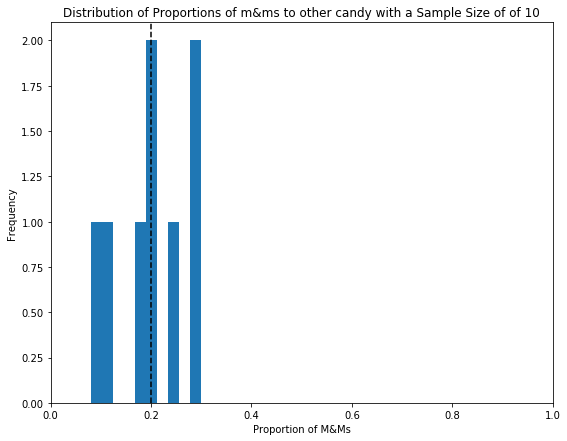

In [24]:
fig, ax = plt.subplots(figsize=(9, 7))

ax.hist(proportion_mms)
ax.axvline(proportion_mms.mean(), linestyle='--', color='black')
ax.set_xlim(0, 1)
ax.set_xlabel('Proportion of M&Ms')
ax.set_ylabel('Frequency')
ax.set_title(f'Distribution of Proportions of m&ms to other candy with a Sample Size of of {sample_size_mms}');
proportion_mms.mean()

#### Create grpahing function
We will be using a similar graph many times later on so lets put this into a function we can reuse later on

In [25]:
def plot_mm_distribution(samples, sample_size, fig, ax, bins=15):
    ax.hist(samples, bins=bins)
    ax.axvline(samples.mean(), linestyle='--', color='black')
    ax.set_xlim(0, 1)
    ax.set_xlabel('Proportion of M&Ms')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Sample Size: {sample_size}, Number of Samples: {len(samples)}, Mean: {samples.mean():.2f}')
    fig.tight_layout()

## Virtual Candy

Lets now model this process using scipy!

In [26]:
sample_size = 10
proportion_m = 0.14
num_samples = 8

# Simulate taking a sample from the candy bowl with a binomial distribution
candy_bowl = scs.binom(sample_size, proportion_m)

candy_bowl

### Get multiple samples of size n and divide by the number of samples to get an array of proportions

In [27]:
class_sample = candy_bowl.rvs(size=num_samples) / sample_size

class_sample.mean()

0.1625

### Plot the distribution

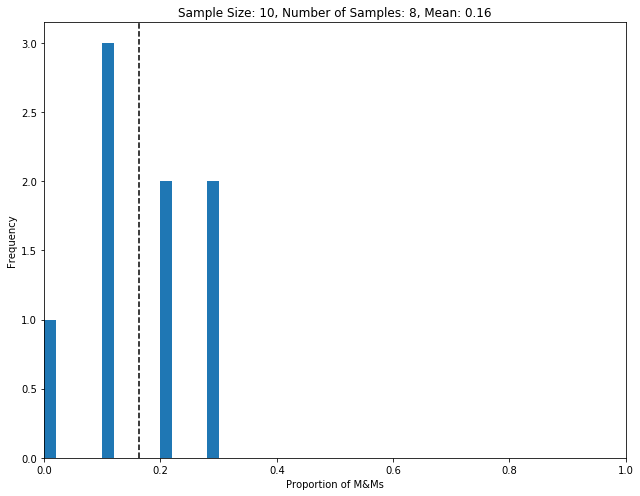

In [28]:
fig, ax = plt.subplots(figsize=(9, 7))

plot_mm_distribution(class_sample, sample_size, fig, ax);

### What happens as we vary sample size and number of samples?

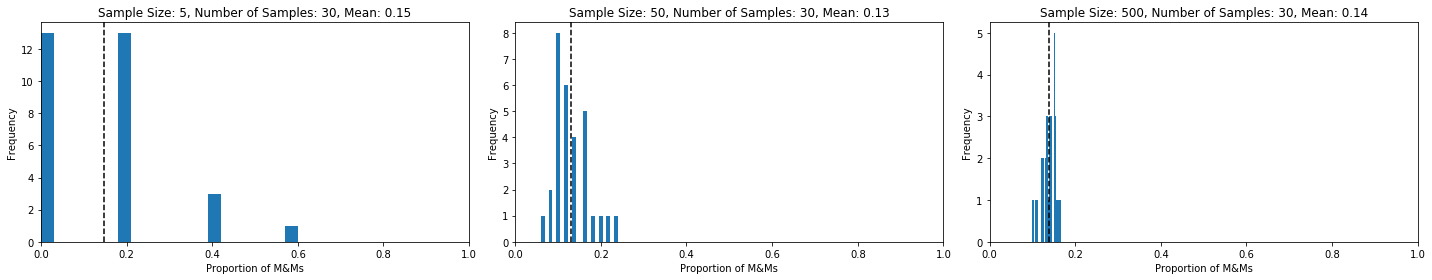

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(20, 4))
proportion = .14
num_samples = 30
sample_sizes = [5, 50, 500]

for sample_size, ax in zip(sample_sizes, axes.flatten()):
    dist = scs.binom(sample_size, proportion)
    samples = dist.rvs(size=num_samples) / sample_size
    plot_mm_distribution(samples, sample_size, fig, ax, bins=20)

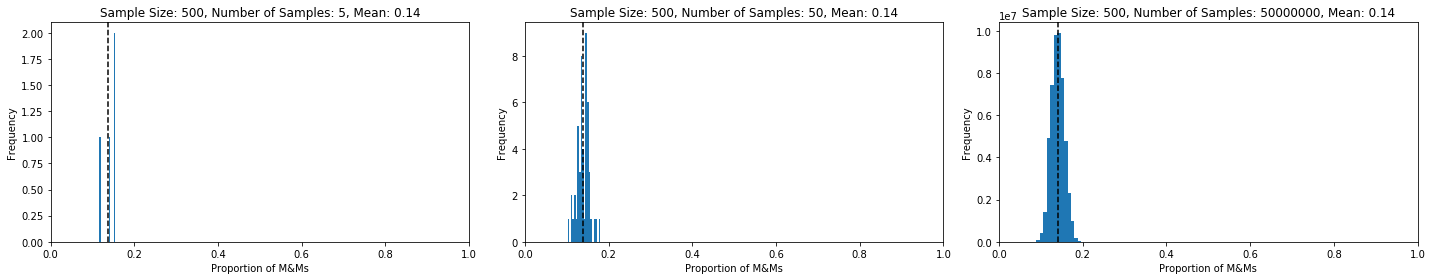

In [40]:
fig, axes = plt.subplots(1, 3, figsize=(20, 4))
proportion = .14
sample_size = 500
num_samples = [5, 50, 50000000]

for num_samples, ax in zip(num_samples, axes.flatten()):
    dist = scs.binom(sample_size, proportion)
    samples = dist.rvs(size=num_samples) / sample_size
    plot_mm_distribution(samples, sample_size, fig, ax, bins=20)

## Types of Sampling

### Nonprobability Sampling

- Volunteer Samples
    - Common when it is very difficult to randomly select from a population ie studies on people who use illegal drugs
- Convenience Samples
- Quota Sampling

### Probability Sampling

- Simple Random Sampling
    - All samples have an equal chance of being selected
- Systematic Sampling